<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 2 / NOTE 4*

# 📝 Assignment
---

# 모델선택(Model Selection)

### 1) 캐글 대회를 이어서 진행합니다. RandomizedSearchCV 를 사용하여 하이퍼파라미터 튜닝을 진행합니다.

- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)를 사용하세요.
- 분류문제에서 맞는 [scoring parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) metric을 사용하세요.
- [OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html) 사용을 권합니다.
- RandomizedSearchCV 를 사용해서 하이퍼파라미터 튜닝을 진행하고 최고 성능을 보이는 모델로 예측을 진행한 후 캐글에 제출합니다.
- **캐글 Leaderboard에서 개선된 본인 Score를 과제 제출폼에 제출하세요.**

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 5.3MB/s 


In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
### 이곳에서 과제를 진행해 주세요 ### 

import pandas as pd
# target = 'vacc_seas_f'
target = 'vacc_h1n1_f'


train_X  = pd.read_csv('/content/drive/MyDrive/train.csv')
train_y  = pd.read_csv('/content/drive/MyDrive/train_labels.csv')[target]
test_X = pd.read_csv('/content/drive/MyDrive/test.csv')

train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42154 entries, 0 to 42153
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 33734 non-null  float64
 1   h1n1_knowledge               33734 non-null  float64
 2   behavioral_antiviral_meds    33635 non-null  float64
 3   behavioral_avoidance         33482 non-null  float64
 4   behavioral_face_mask         33710 non-null  float64
 5   behavioral_wash_hands        33683 non-null  float64
 6   behavioral_large_gatherings  33640 non-null  float64
 7   behavioral_outside_home      33633 non-null  float64
 8   behavioral_touch_face        33571 non-null  float64
 9   doctor_recc_h1n1             40269 non-null  float64
 10  doctor_recc_seasonal         40269 non-null  float64
 11  chronic_med_condition        40837 non-null  float64
 12  child_under_6_months         32705 non-null  float64
 13  health_insurance

In [160]:
train_X = train_X.drop_duplicates()

<function matplotlib.pyplot.show>

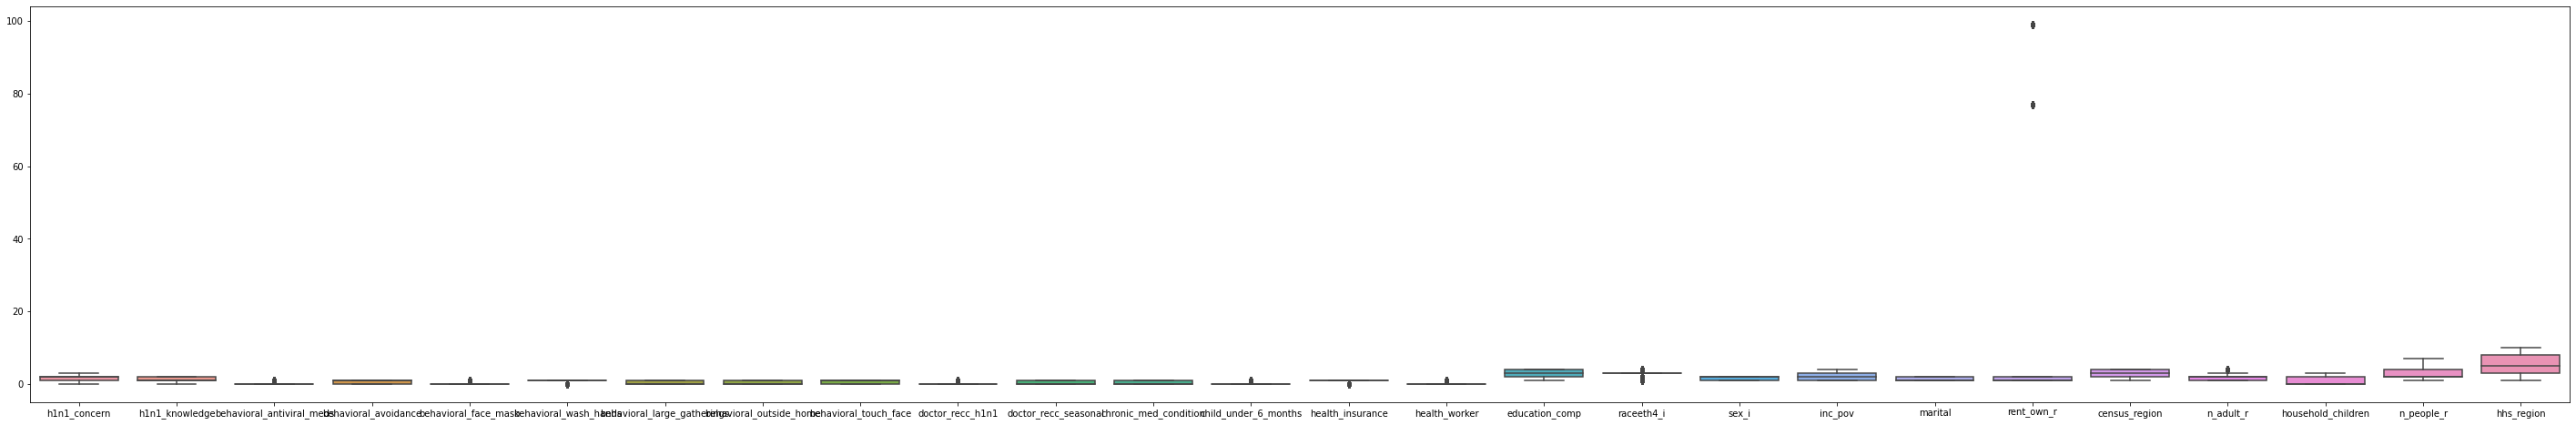

In [161]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,8))
sns.boxplot(data=train_X)
plt.show

In [164]:
def outlier(data, col):
  q1, q3 = np.percentile(data[col], [25,75])
  iqr = q3 - q1
  lower = q1 - (iqr*1.5)
  upper = q3 + (iqr*1.5)
  return data[(data[col] < lower)|(data[col] > upper)].index
  
outlier(train_X, 'rent_own_r')

Int64Index([], dtype='int64')

In [165]:

# ordinal 인코딩
from category_encoders import OrdinalEncoder 
# 대괄호 한개 
encoder = OrdinalEncoder(cols=['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc','agegrp'])
train_X = encoder.fit_transform(train_X)
test_X = encoder.transform(test_X)


from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols=['employment_status',	'census_msa',	'employment_industry','employment_occupation','state'])
train_X = encoder.fit_transform(train_X)
test_X = encoder.transform(test_X)



/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


KeyError: ignored

In [142]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='median')
col = train_X.columns
train_X = pd.DataFrame(imp.fit_transform(train_X), columns=col)
test_X = pd.DataFrame(imp.transform(test_X), columns=col)

In [143]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
train_X = st.fit_transform(train_X)
test_X = st.transform(test_X)

In [156]:
# 주성분분석이므로 특정열로 골라지는 것이 아닌 특성을 합쳐 요약해 저차원으로 만듬

from sklearn.decomposition import PCA
num = 15
pca = PCA(n_components= num)
train_X = pca.fit_transform(train_X)
test_X= pca.transform(test_X)
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)

ValueError: ignored

In [148]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, train_size = 0.8, random_state= 24)


In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(max_depth= 20, n_estimators= 300)
rf.fit(train_X, train_y)
pred_y = rf.predict(val_X)
f1_score(val_y, pred_y)

0.38848920863309355

In [152]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

dist = {
     'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
}


clf = RandomizedSearchCV(
    rf,
    param_distributions = dist,
    n_iter = 50,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1,
     n_jobs=-1  
)




In [ ]:
clf.fit(train_X,train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.4min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 15.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'max_depth': 20, 'n_estimators': 390}
MAE:  0.17249355039587225


In [ ]:
rf = clf.best_estimator_

In [ ]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=390,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score

pred_y = rf.predict(val_X)
mae = mean_absolute_error(val_y,pred_y)
print(f'검증세트 MAE: ${mae:,.5f}')
f1 = f1_score(val_y,pred_y)
print(f'검증세트 F1: ${f1:,.5f}')


검증세트 MAE: $0.16333
검증세트 F1: $0.56982


In [ ]:
pred_y = rf.predict(test_X)
final = pd.DataFrame(pred_y, columns=['vacc_h1n1_f'])
final.to_csv("fourth.csv",index_label='id')

pd.read_csv("fourth.csv")

,id,vacc_h1n1_f
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
28099,28099,0
28100,28100,0
28101,28101,0
28102,28102,0


## 🔥 도전과제


### 2) [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 를 사용하여 하이퍼파라미터 튜닝을 진행합니다.
- 모델 성능을 높이기 위해 가능한 시도를 다 해보세요.
- 모델 성능에 가장 큰 영향을 준 하이퍼파라미터에 대해서 분석하고 설명해 보세요.



In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 